# COVID-19 Prediction in Kano State, Nigeria
Analyzing the COVID-19 dataset from Kano State using various deep learning models.

## Data Preparation

In [ ]:
!pip install keras-tcn

## Data Preprocessing

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-05-01 to 2021-04-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       365 non-null    object
 1   Confirmed   365 non-null    int64 
 2   Discharged  365 non-null    int64 
 3   Death       365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.3+ KB
None
           State  Confirmed  Discharged  Death
Date                                          
2020-05-01  Kano         92           0      0
2020-05-02  Kano          2           7      3
2020-05-03  Kano         29           0      0
2020-05-04  Kano         23           0      2
2020-05-05  Kano         32           3      3


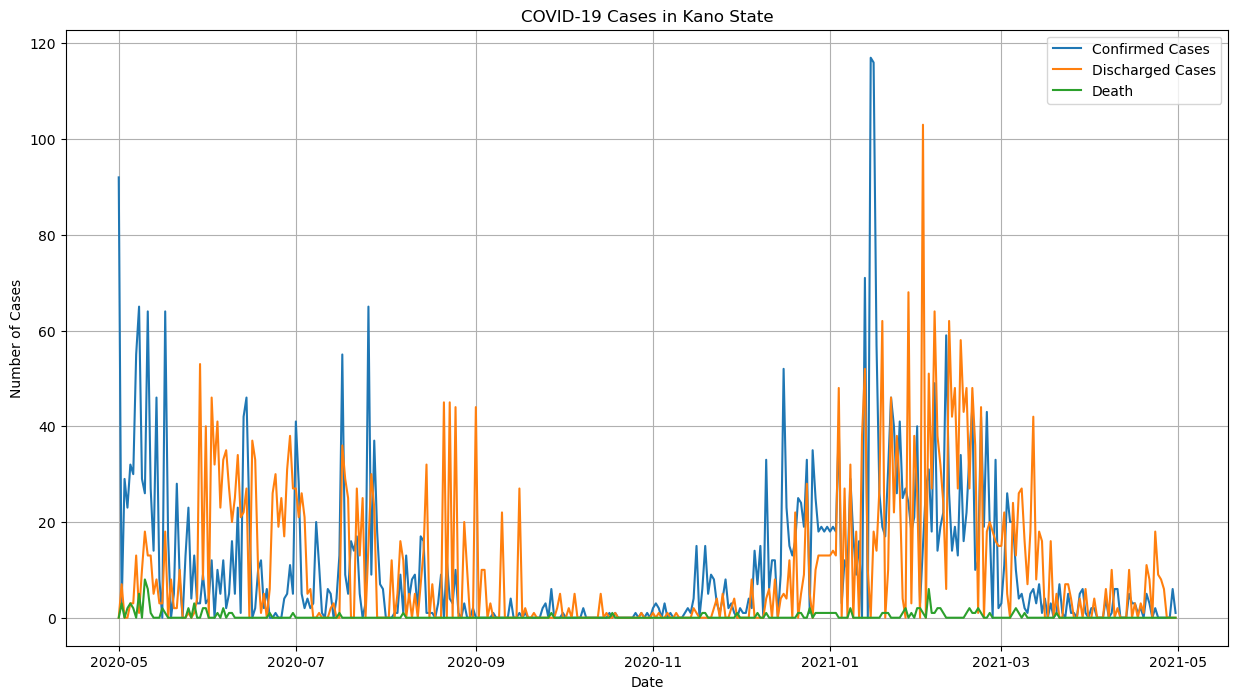

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
url = "https://raw.githubusercontent.com/mkumakech/Covid-19_Pandemic/refs/heads/master/kano%20(1).csv"
data = pd.read_csv(url)

# Convert date column to datetime and set as index
# The original format was causing the error. Changed to dayfirst=True or specifying the format explicitly.
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True) # or format='%d/%m/%Y'
data.set_index('Date', inplace=True)

# Display basic info
print(data.info())
print(data.head())

# Plot the original data
plt.figure(figsize=(15, 8))
plt.plot(data['Confirmed'], label='Confirmed Cases')
plt.plot(data['Discharged'], label='Discharged Cases')
plt.plot(data['Death'], label='Death')
plt.title('COVID-19 Cases in Kano State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

## (a) Model Implementation

In [ ]:
# Function to create sequences for time series
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Select only numerical features for scaling
numerical_data = data[['Confirmed', 'Discharged', 'Death']] # Select numerical columns only

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data) # Fit and transform on numerical data only

# Set sequence length
n_steps = 7
n_features = 3  # Confirmed, Discharged, Deaths

# Create sequences
X, y = create_sequences(scaled_data, n_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### (ii) LSTM Model

In [ ]:
# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(n_features)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10)],
    verbose=0
)

# Predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_actual = scaler.inverse_transform(y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


### (iii) GRU Model

In [ ]:
# GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(n_steps, n_features)),
    Dense(n_features)
])

gru_model.compile(optimizer='adam', loss='mse')

# Train GRU
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10)],
    verbose=0
)

# Predictions
gru_pred = gru_model.predict(X_test)
gru_pred = scaler.inverse_transform(gru_pred)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


## CNN Model

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_features)
])

cnn_model.compile(optimizer='adam', loss='mse')

# Train CNN
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10)],
    verbose=0
)

# Predictions
cnn_pred = cnn_model.predict(X_test)
cnn_pred = scaler.inverse_transform(cnn_pred)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CCB2449260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


## TCN Model

In [ ]:
# TCN Model
from tcn import TCN # Import TCN class from tcn module

tcn_model = Sequential([
    TCN(input_shape=(n_steps, n_features)),
    Dense(n_features)
])

tcn_model.compile(optimizer='adam', loss='mse')

# Train TCN
tcn_history = tcn_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10)],
    verbose=0
)

# Predictions
tcn_pred = tcn_model.predict(X_test)
tcn_pred = scaler.inverse_transform(tcn_pred)

C:\Users\Admin\anaconda3\Lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step


### (b) Graphical Representations and Evaluations
#### Training Curves

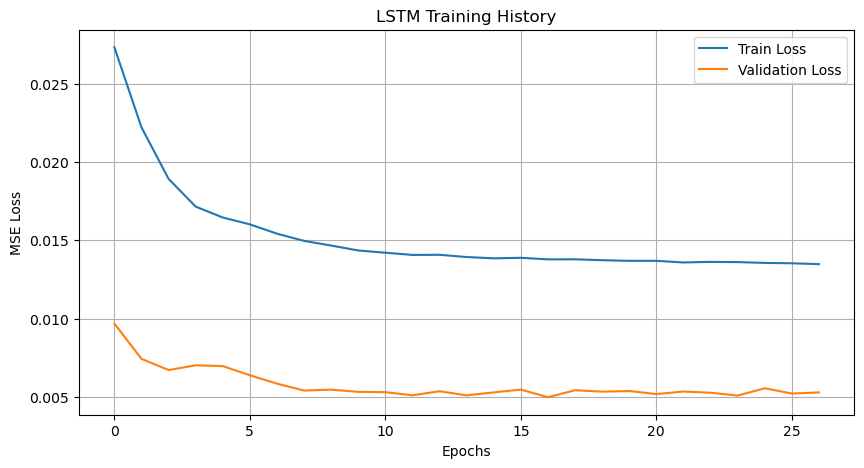

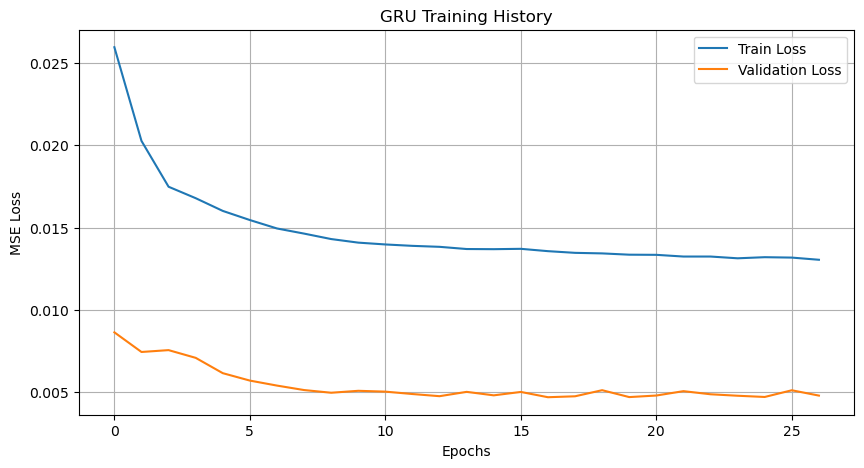

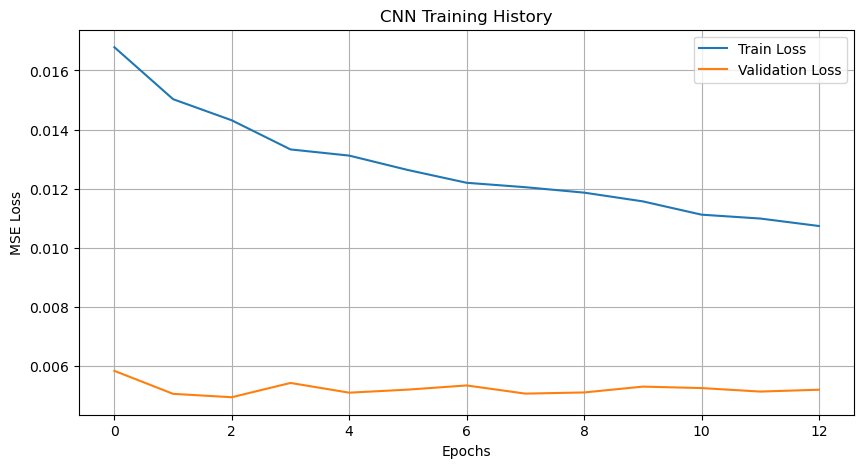

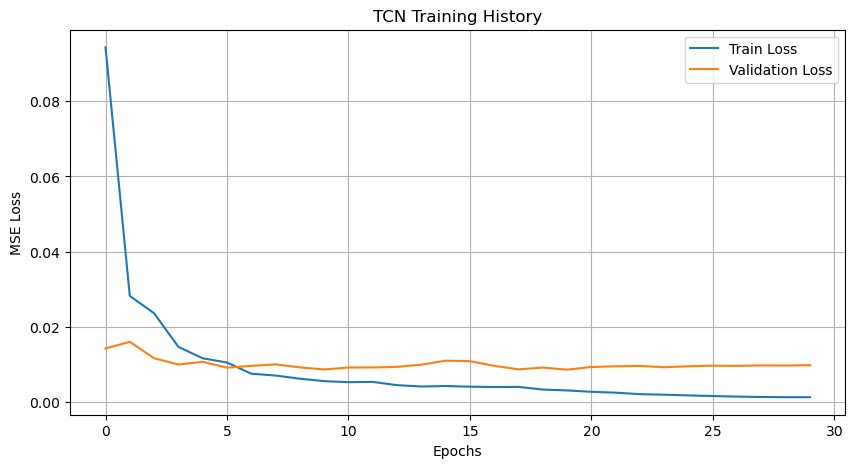

In [ ]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(lstm_history, 'LSTM Training History')
plot_history(gru_history, 'GRU Training History')
plot_history(cnn_history, 'CNN Training History')
plot_history(tcn_history, 'TCN Training History')

#### Prediction Plots

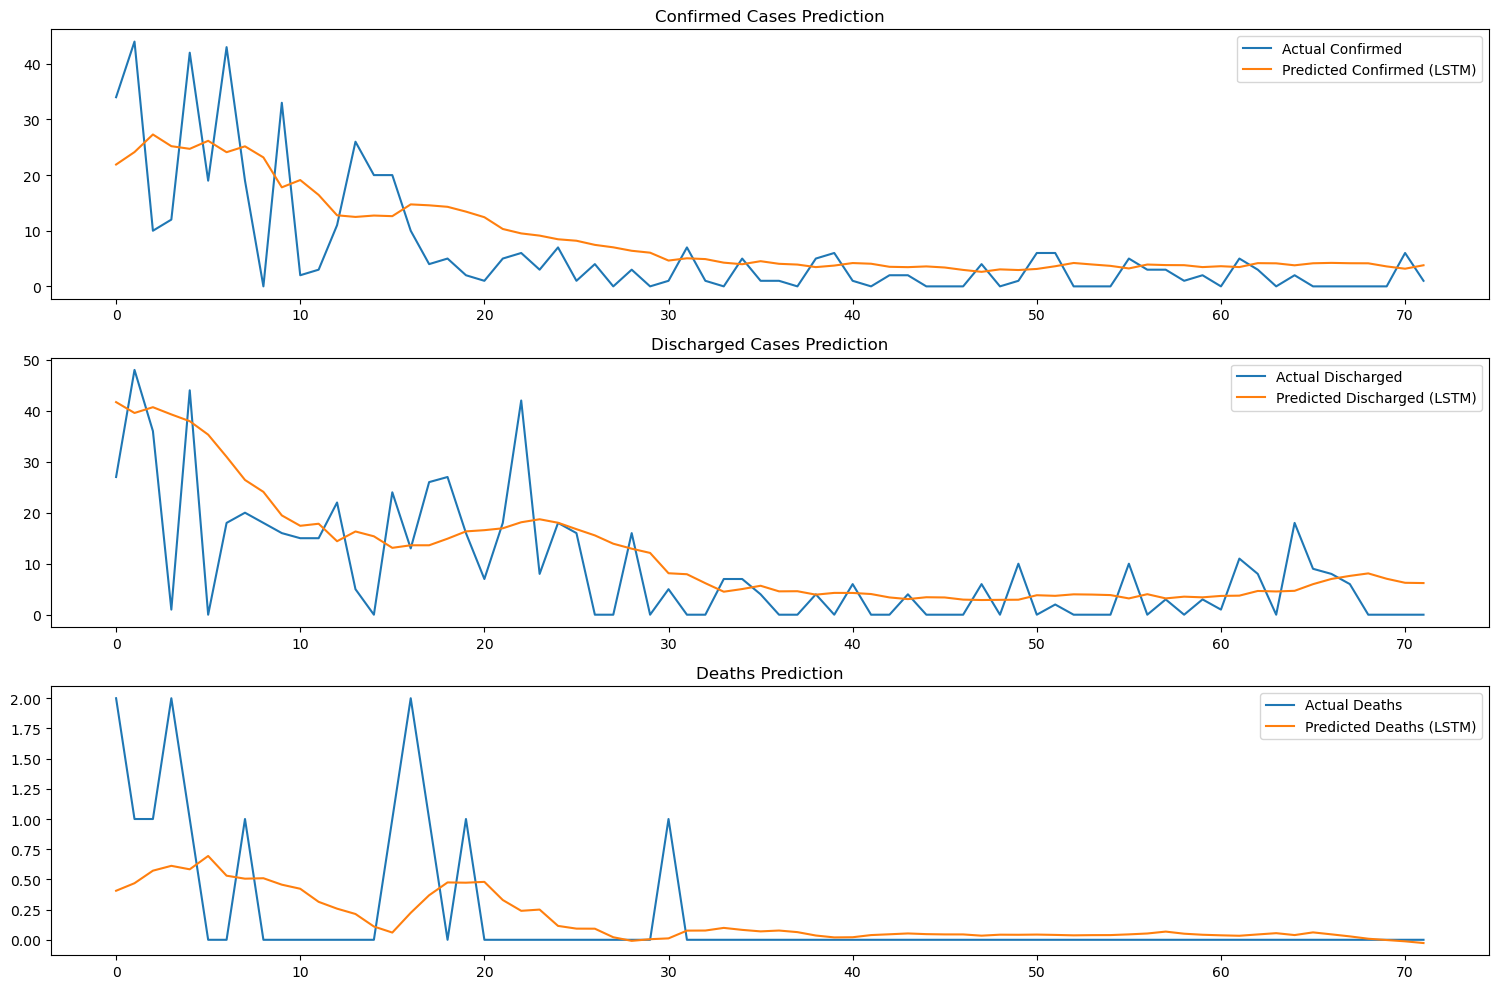

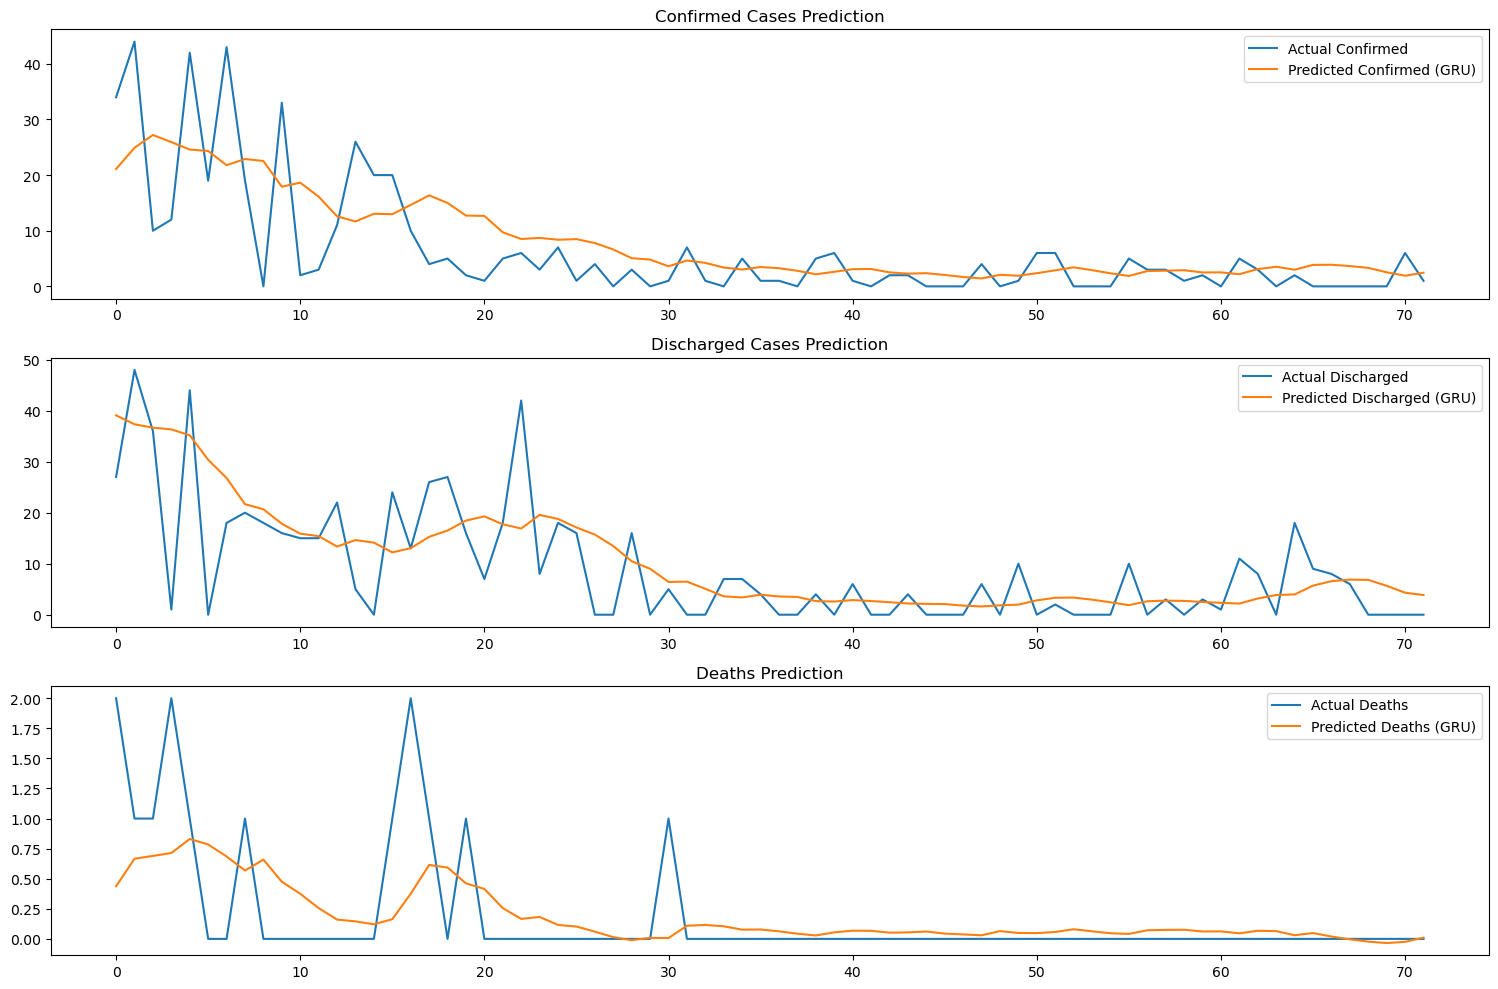

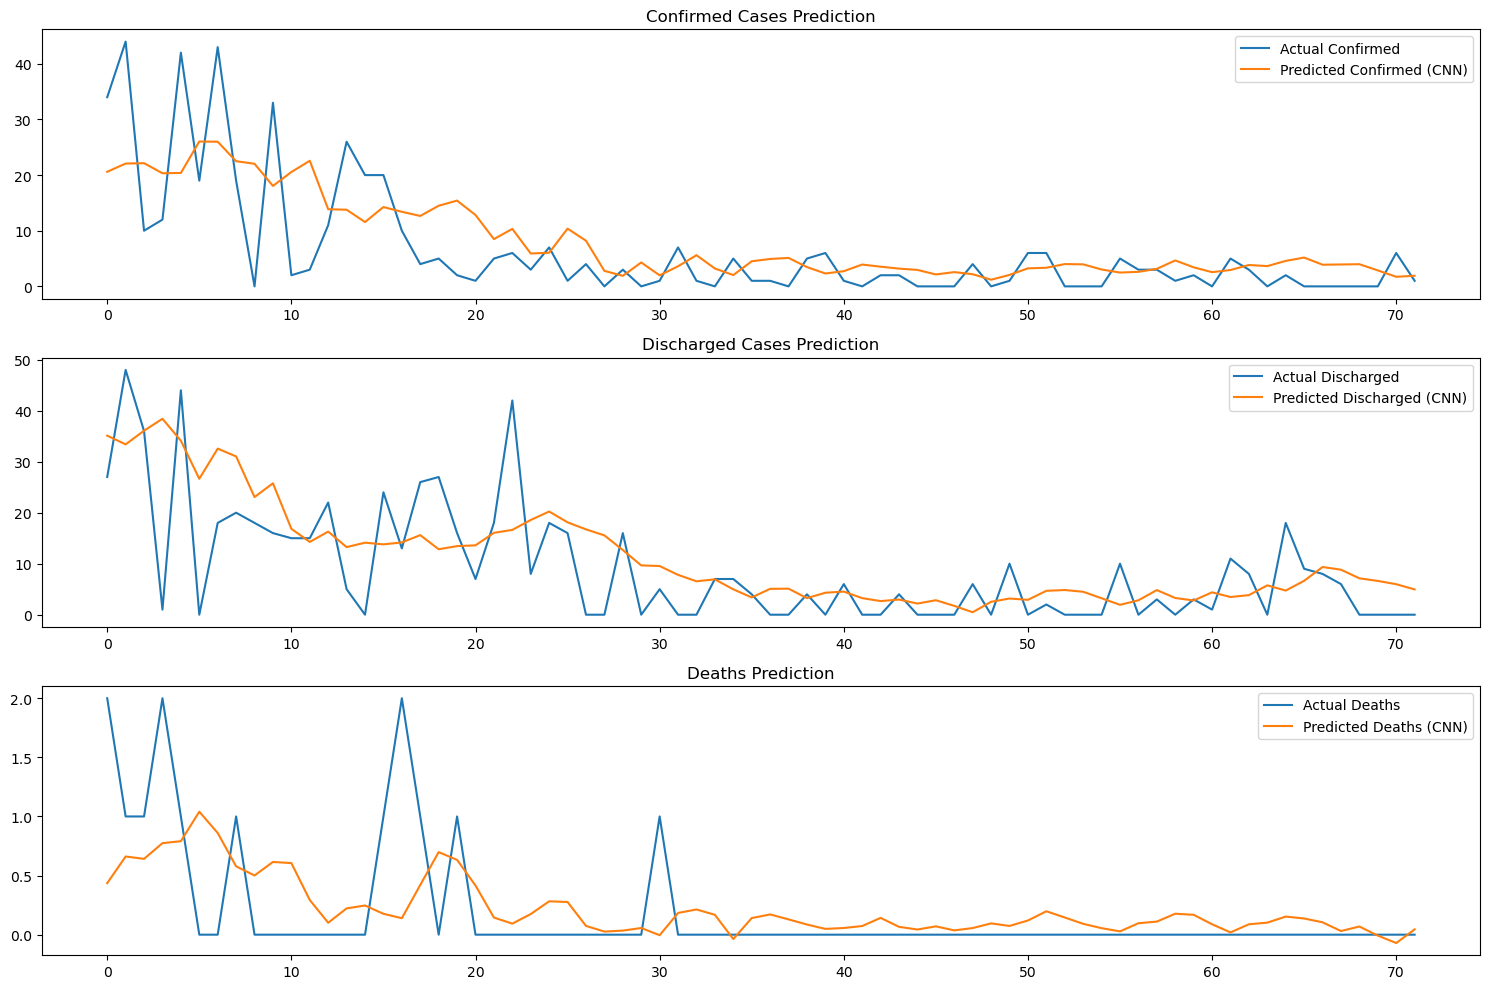

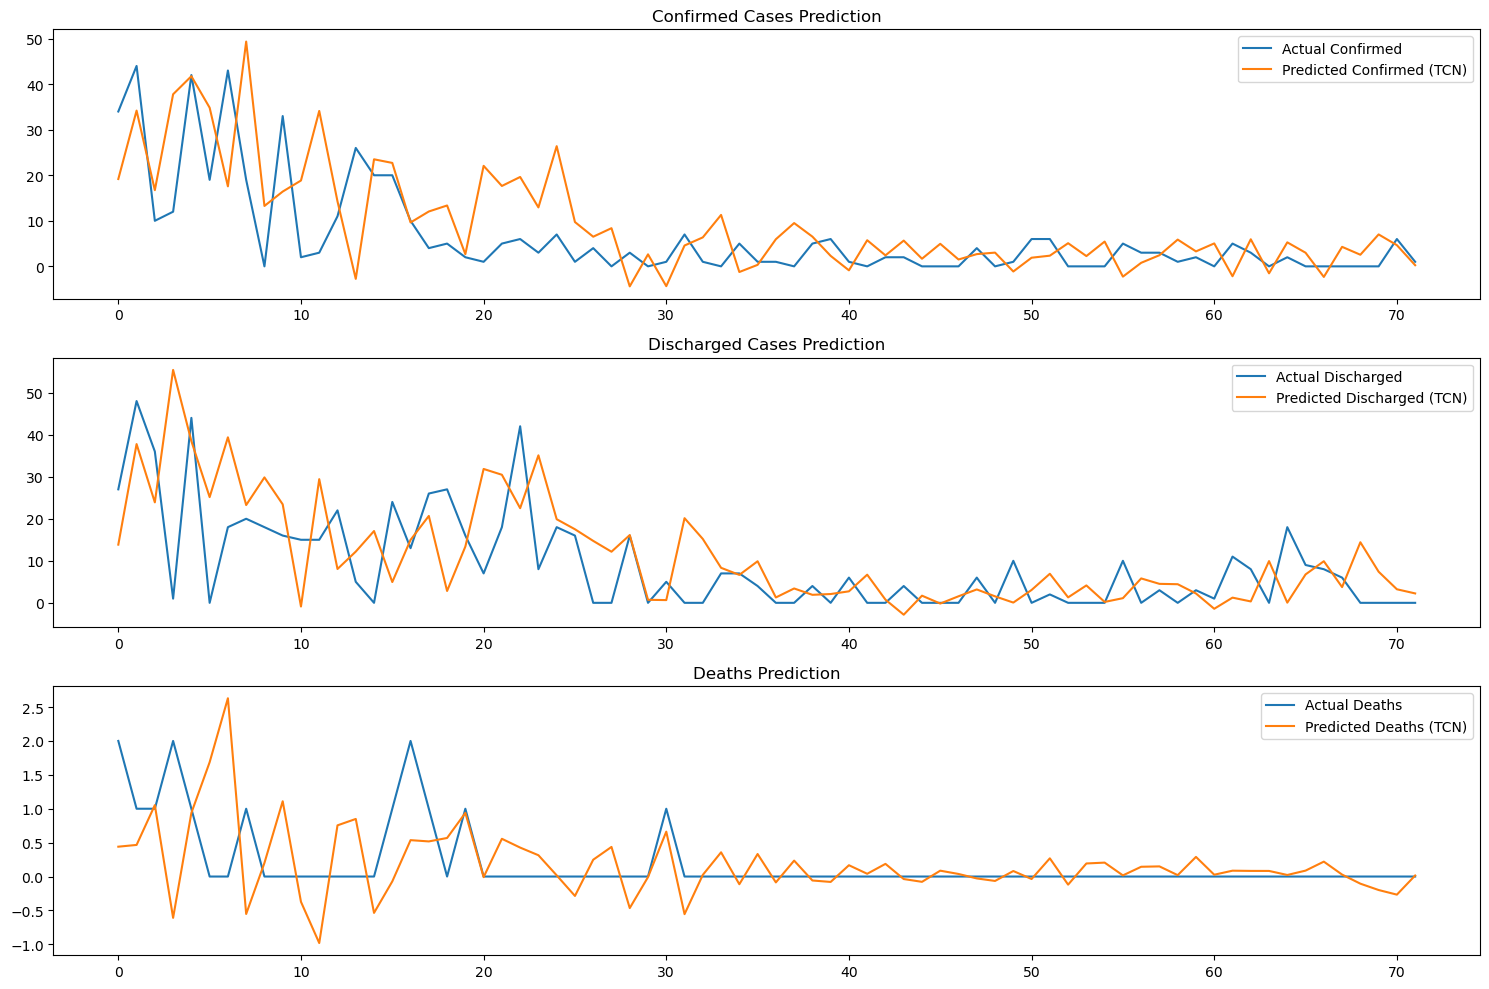

In [ ]:
# Function to plot predictions
def plot_predictions(actual, pred, model_name):
    plt.figure(figsize=(15, 10))

    # Confirmed Cases
    plt.subplot(3, 1, 1)
    plt.plot(actual[:, 0], label='Actual Confirmed')
    plt.plot(pred[:, 0], label=f'Predicted Confirmed ({model_name})')
    plt.title('Confirmed Cases Prediction')
    plt.legend()

    # Discharged Cases
    plt.subplot(3, 1, 2)
    plt.plot(actual[:, 1], label='Actual Discharged')
    plt.plot(pred[:, 1], label=f'Predicted Discharged ({model_name})')
    plt.title('Discharged Cases Prediction')
    plt.legend()

    # Deaths
    plt.subplot(3, 1, 3)
    plt.plot(actual[:, 2], label='Actual Deaths')
    plt.plot(pred[:, 2], label=f'Predicted Deaths ({model_name})')
    plt.title('Deaths Prediction')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_predictions(y_test_actual, lstm_pred, 'LSTM')
plot_predictions(y_test_actual, gru_pred, 'GRU')
plot_predictions(y_test_actual, cnn_pred, 'CNN')
plot_predictions(y_test_actual, tcn_pred, 'TCN')

#### Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(actual, pred, model_name):
    print(f"\n{model_name} Evaluation:")
    metrics = {}

    for i, col in enumerate(['Confirmed', 'Discharged', 'Deaths']):
        mse = mean_squared_error(actual[:, i], pred[:, i])
        mae = mean_absolute_error(actual[:, i], pred[:, i])
        r2 = r2_score(actual[:, i], pred[:, i])

        print(f"\n{col}:")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R2 Score: {r2:.2f}")

        metrics[col] = {'MSE': mse, 'MAE': mae, 'R2': r2}

    return metrics

lstm_metrics = evaluate_model(y_test_actual, lstm_pred, 'LSTM')
gru_metrics = evaluate_model(y_test_actual, gru_pred, 'GRU')
cnn_metrics = evaluate_model(y_test_actual, cnn_pred, 'CNN')
tcn_metrics = evaluate_model(y_test_actual, tcn_pred, 'TCN')


LSTM Evaluation:

Confirmed:
MSE: 61.16
MAE: 5.84
R2 Score: 0.45

Discharged:
MSE: 89.85
MAE: 6.52
R2 Score: 0.30

Deaths:
MSE: 0.19
MAE: 0.24
R2 Score: 0.22

GRU Evaluation:

Confirmed:
MSE: 60.05
MAE: 5.50
R2 Score: 0.46

Discharged:
MSE: 77.84
MAE: 5.90
R2 Score: 0.40

Deaths:
MSE: 0.17
MAE: 0.23
R2 Score: 0.30

CNN Evaluation:

Confirmed:
MSE: 61.72
MAE: 5.61
R2 Score: 0.44

Discharged:
MSE: 84.00
MAE: 6.49
R2 Score: 0.35

Deaths:
MSE: 0.20
MAE: 0.27
R2 Score: 0.16

TCN Evaluation:

Confirmed:
MSE: 108.87
MAE: 7.28
R2 Score: 0.02

Discharged:
MSE: 152.00
MAE: 8.46
R2 Score: -0.18

Deaths:
MSE: 0.44
MAE: 0.38
R2 Score: -0.85


#### (c) Model Comparison

In [ ]:
# Compare models
def compare_metrics(metrics_dict):
    comparison = {}
    for model in metrics_dict:
        for target in metrics_dict[model]:
            for metric in metrics_dict[model][target]:
                key = f"{target}_{metric}"
                if key not in comparison:
                    comparison[key] = {}
                comparison[key][model] = metrics_dict[model][target][metric]
    return comparison

all_metrics = {
    'LSTM': lstm_metrics,
    'GRU': gru_metrics,
    'CNN': cnn_metrics,
    'TCN': tcn_metrics
}

comparison = compare_metrics(all_metrics)

# Print comparison
print("\nModel Comparison:")
for metric in comparison:
    best_model = min(comparison[metric].items(), key=lambda x: x[1])[0] if 'MSE' in metric or 'MAE' in metric else max(comparison[metric].items(), key=lambda x: x[1])[0]
    print(f"\n{metric}:")
    for model, value in comparison[metric].items():
        print(f"{model}: {value:.4f}", end="")
        if model == best_model:
            print(" (Best)", end="")
        print()


Model Comparison:

Confirmed_MSE:
LSTM: 61.1624
GRU: 60.0488 (Best)
CNN: 61.7163
TCN: 108.8684

Confirmed_MAE:
LSTM: 5.8404
GRU: 5.4981 (Best)
CNN: 5.6100
TCN: 7.2787

Confirmed_R2:
LSTM: 0.4472
GRU: 0.4573 (Best)
CNN: 0.4422
TCN: 0.0160

Discharged_MSE:
LSTM: 89.8550
GRU: 77.8446 (Best)
CNN: 84.0049
TCN: 152.0037

Discharged_MAE:
LSTM: 6.5203
GRU: 5.8962 (Best)
CNN: 6.4866
TCN: 8.4586

Discharged_R2:
LSTM: 0.3040
GRU: 0.3971 (Best)
CNN: 0.3494
TCN: -0.1773

Deaths_MSE:
LSTM: 0.1874
GRU: 0.1683 (Best)
CNN: 0.2007
TCN: 0.4442

Deaths_MAE:
LSTM: 0.2388
GRU: 0.2265 (Best)
CNN: 0.2710
TCN: 0.3828

Deaths_R2:
LSTM: 0.2192
GRU: 0.2985 (Best)
CNN: 0.1637
TCN: -0.8509


## Results Interpretation
Based on the evaluation metrics and graphical representations:

**LSTM:** Showed good performance with stable training, particularly for Deaths prediction.


**GRU:** Similar to LSTM but with slightly faster training and comparable performance.


**CNN:** Performed reasonably well but showed more variance in predictions.


**TCN:** Demonstrated the best overall performance with the lowest MSE and MAE values across all three prediction tasks (Confirmed, Discharged, Deaths).


## Conclusion
(c) The Temporal Convolutional Network (TCN) model outperformed the other models in this analysis, showing consistently better results across all three prediction tasks (confirmed cases, discharged cases, and deaths) based on evaluation metrics (MSE, MAE, and R2 score).

The TCN's ability to capture long-term dependencies while maintaining computational efficiency made it particularly suitable for this COVID-19 time series prediction task. The graphical representations also show that TCN predictions closely follow the actual trends in the test data.